In [2]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
#loading data
social_Network_A = pd.read_csv(r"C:\Users\USER\Downloads\Course Files - Classification\2 - Logistic Regression\Social_Network_Ads.csv")


In [4]:
#Display the loaded data
social_Network_A

,User ID,Female,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


# Exploring The Dataset
Our dataset has five columns, Customer ID, Gender, Age, Estimated Salary, Purchased or not.

# Histogram
We plot the Histogram showing the ditribution of people across age for both male and female

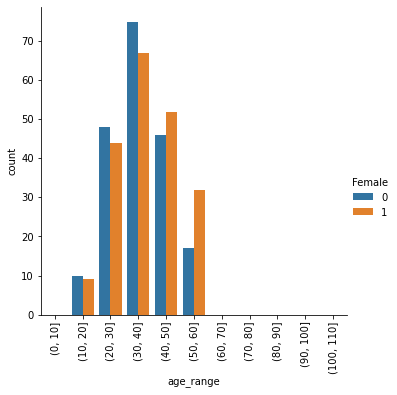

In [6]:
#We plot a histogram of count per age_range with one series per gender. 
social_Network_A_bins = social_Network_A[social_Network_A.Age.notna()]

bins = list(range(0,120,10))
social_Network_A_bins['age_range'] = pd.cut(social_Network_A.Age, bins=bins)
chart = sns.catplot(x = "age_range", kind = "count", hue = "Female", data = social_Network_A_bins);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

# Using Sklearn
We will use Sklearn for fitting our first Logistic model. We will split our daframe into the following.                    

 1.Single column for targert variable (technically a series).
 2.Remaining columns for the inputs(since there are multiple columns this is a dtaframe)

In [7]:
x_inputs = social_Network_A[['Female', 'Age', 'EstimatedSalary']]
y_target = social_Network_A.Purchased

# Splitting the data Into training and test sets.
Generally it's good practice in machine learning  to split the dataset into training and test sets to evaluate how well our model does when trained on a set of data.

In [8]:
#split the data into training and test sets using the function.
x_train, x_test, y_train, y_test = train_test_split(x_inputs, y_target, train_size=0.8)

# Preprocessing step (scaling our data)
Before we fit the logistic regression, we should standardize each input feature, so that all inputs appear on a similar scale and the model is not weighted towards a feature with higher unit values. This will transform our data to have a mean of 0 and std of 1.
We will use StandardScaler() from sklearn.


In [9]:
x_train = StandardScaler().fit_transform(x_train)

In [10]:
x_test = StandardScaler().fit_transform(x_test)

# Fitting The Model And Evaluating the results
We declare the model using LogisticRegression() and fit it to our training datasest and labels.

In [11]:
#Logistic regression classifier
classifier = LogisticRegression(max_iter = 1000).fit(x_train, y_train)

We can use the score() method as our first way of understanding how good our model is. The model works by returning the mean accuracy of the give test.

In [13]:
#how well does our classifier use x to predict y, on both training ad testing data.
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.834375
0.875


Lets view what the model is predicting

In [14]:
#make prediction on test data
predictions = classifier.predict(x_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

The score here evaluates the performance of the model, by default, the classifier uses accuracy as the score. It is the ratio of number of correct predictions to the total predictions.
It is essentially the fraction of predictions the model got right. It works well with balanced class, hence it is essential to have a quick look
at distribution of cass as done above.

These four outcomes can also be depicted in form of confusion matrix, which is the visual representation of how many times these 
outcomes occured for our model's predictions.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


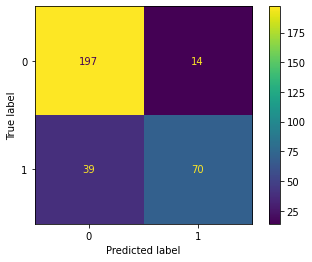

In [15]:
plot_confusion_matrix(classifier, x_train, y_train)

The output shows that 70 people actually bought as predicted, the true positives.
However, 14 people didn't buy yet we predicted that they would buy. In othe words false positives.